In [1]:
from vpython import*
import math
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

In [2]:
G = 6.67430e-11 # newton's gravitational constant 

In [3]:
# calculate gravitational force between two bodies 
def gforce(p1, p2): # accepts two planet objects
    r_vec = (p1.pos - p2.pos) # distance vector
    r_hat = r_vec / mag(r_vec) # vector for direction of force
    F_mag = (G * p1.mass * p2.mass) / mag(r_vec)**2 # compute magnitude of gravitational force
    F_vec = -F_mag * r_hat # combine magnitude and direction into vector, negative implies always attractive
    return F_vec # returns force vector

# a.) Newton's Cannon

**Approach**
1. for each time step: find gravitational force acting on a given body, update body's momentum,
   and update body's position.
2. From Newton's equation : $F_{g}= \frac{GM_{1}M_{2}}{r^{2}}$ get the direction of the force using:
   $\vec{F}= \frac{GM_{1}M_{2}}{|\vec{\hat{r}}^{2}|}\hat{r}$, where $\hat{r}$ is the direction vector.
3. Use $\Delta\vec{\rho}= \vec{F}\Delta t$ to update momentum.
4. Using the updated momentum, we can solve for the body's position where $\rho = mv$, $\frac{\rho}{m}=v$,
   $vt = x$.

**Comments**
1. The simulation iterates through different velocities: below escape velocity, obit velocity, and at escape velocity.
2. Considering the gravitational force of the ball acting on the earth is negligable, it was omitted from the code.
3. Units in all simulations are in km, km/s, $G=\frac{Nm^{2}}{kg^{2}}$.

In [4]:
scene1 = canvas()
scene1.range = 10e6

<IPython.core.display.Javascript object>

In [5]:
space = sphere(pos=vector(0,0,0),texture="https://i.imgur.com/1nVWbbd.jpg",radius=5e7,shininess=1)

r_earth =  6.371e6 # radius in meters
m_earth = 5.9722e24 # mass in kg
m_ball = 1e4

v_0x = [7650, 8000, 11200] # list of 3 obital velocities

# simulate for each velocity
for i in v_0x:
    v_0y = -(G * m_earth) / r_earth **2
    pos_0 = r_earth*1.05*vector(cos(pi/2),sin(pi/2),0) # find initial position for cannon and cannonball

    earth = sphere(pos=vector(0, 0, 0),radius=r_earth, texture=textures.earth, mass=m_earth, p=0)
    ball = sphere(pos=vector(pos_0), radius=.03*r_earth, color=color.yellow, make_trail=True, mass=m_ball,
           interval=10, p=vector(i, v_0y, 0)*m_ball)
    cannon = extrusion(path=[vector(9e5,1e5,0), vector(0, 0, 0)], pos=vector(1e5, pos_0.y, 0), 
                       shape=shapes.circle(pos=(0, pos_0.y, 0), radius=.05*r_earth), color=color.red)
    wheel1 = cylinder(pos=vector(0, r_earth + .04*r_earth, .06*r_earth), axis=vector(0,0,1e5), radius=.05*r_earth)
    wheel2 = cylinder(pos=vector(0, r_earth + .04*r_earth, -.06*r_earth), axis=vector(0,0,1e5), radius=.05*r_earth)

    t = 0
    dt = 1
    
    # while the cannonball doesnt touch the earth and t < 7s
    while mag(ball.pos) >= r_earth + ball.radius*.5 and t < 7e3:
        rate(1000)
        ball.force = gforce(ball, earth)
        ball.p += ball.force*dt
        ball.pos += ball.p/ball.mass *dt
        t += dt
        
    ball.visible=False
    ball.clear_trail()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# b.) Solar System

**Approach**
1. Uses same approach as Newton's Cannon but with multiple celestial bodies.
2. Find the summation of gravitational forces acting on each body, update momentum for each body, and update          position of each body.

**Comments**
1. Uses a list to store each planet object to iterate over to condense code.
2. Each planet has attributes: position, mass, radius, p(momentum) vector, and force vector for ease of access.
3. Planet sizes are not to scale for sake of visibility.

In [6]:
scene2 = canvas()
scene2.range = 250e6

# real values for each planet's radius and mass
r_sun = 6.965e5 
r_merc = 2.4397e3
r_venus = 6.0518e3
r_earth = 6.3781e3
r_mars = 3.3962e3

m_sun = 1.9891e30
m_merc = 3.285e23
m_venus = 4.867e24
m_earth = 5.972e24
m_mars = 6.39e23

space = sphere(pos=vector(0,0,0),texture="https://i.imgur.com/1nVWbbd.jpg",radius=250e7,shininess=1)
scene2.camera.pos=vector(4.3989e8, 2.8984e8, 5.37413e7)
scene2.camera.axis=vector(-4.39167e8, -2.8984e8, -5.33093e7)

scale = 1e6
v_0z = 1e6

# each position is a real distance relative to the sun in km
mercury=sphere(pos=vector(63.929*scale, 0, 0),texture="https://upload.wikimedia.org/wikipedia/commons/3/30/Mercury_in_color_-_Prockter07_centered.jpg", 
            radius=1e3*r_merc, make_trail=True, mass=m_merc, p=vector(0, 0, v_0z*1.5)*m_merc, force=vector(0, 0, 0))
venus=sphere(pos=vector( 107.563*scale, 0, 0),texture="https://upload.wikimedia.org/wikipedia/commons/1/19/Cylindrical_Map_of_Venus.jpg", emissive = True, 
             radius=1e3*r_venus, make_trail=True, mass=m_venus, p=vector(0, 0, 1.15e6)*m_venus, force=vector(0, 0, 0))
earth=sphere(pos=vector(147.632*scale, 0, 0),texture=textures.earth, radius=1e3*r_earth, mass=m_earth, 
             make_trail=True, p=vector(0, 0, v_0z)*m_earth, force=vector(0, 0, 0))
mars=sphere(pos=vector(222.975*scale,0,0),texture="https://upload.wikimedia.org/wikipedia/commons/0/02/OSIRIS_Mars_true_color.jpg", emissive = True, make_trail=True,
             radius=1e3*r_mars, mass=m_mars, p=vector(0, 0, 8e5)*m_mars,force=vector(0, 0, 0))
sun=sphere(pos=vector(0, 0, 0),texture="https://upload.wikimedia.org/wikipedia/commons/b/b4/The_Sun_by_the_Atmospheric_Imaging_Assembly_of_NASA%27s_Solar_Dynamics_Observatory_-_20100819.jpg",
           flipx = False , make_trail=True, interval=50, shininess = 0.9, radius=15*r_sun, mass=m_sun, p=vector(0, 0, 0), force=vector(0,0,0))
scene2.camera.follow(sun)


<IPython.core.display.Javascript object>

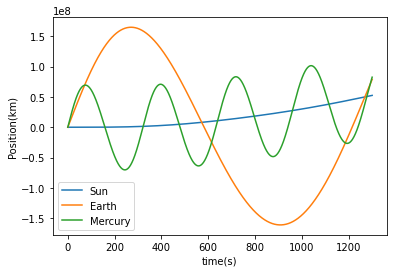

In [7]:
# list of planets
planets = []
time = []
sunPos = []
earthPos = []
mercPos = []

planets.append(mercury)
planets.append(venus)
planets.append(earth)
planets.append(mars)

dt = .1
t = 0
solarYear = 0

while t < 2000:
    rate(1000)
    time.append(t)
    sunPos.append(sun.pos.z)
    earthPos.append(earth.pos.z)
    mercPos.append(mercury.pos.z)

    # for each planet, sum the forces of every body acting on element
    for i in planets:
        sun.force += gforce(sun, i) # add force of sun on every planet
        i.force = gforce(i, sun) # add force of every planet on sun
        for j in planets:
            if i.pos != j.pos:
                i.force += gforce(i, j) # add forces on each respective planet on each other

    # update momentums
    sun.p += sun.force * dt
    sun.pos += sun.p/sun.mass * dt

    # update positions 
    for i in planets:
        i.p += i.force * dt
        i.pos += i.p/i.mass * dt

    t += dt
    
plt.plot(time, sunPos, label="Sun")
plt.plot(time, earthPos, label="Earth")
plt.plot(time, mercPos, label="Mercury")
plt.xlabel("time(s)")
plt.ylabel("Position(km)")
plt.legend()


**Outputs for different values of $dt$**
1. 0.01
<img src="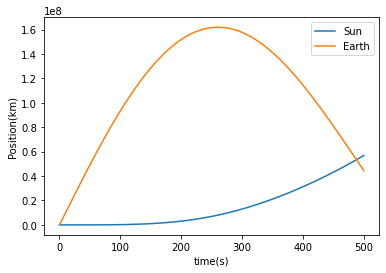
">
2. 0.1
<img src="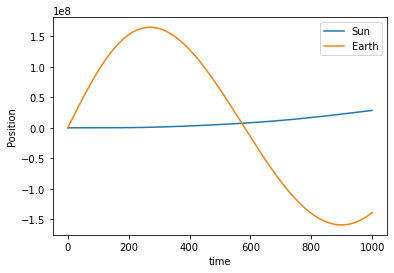
">
3. 1
<img src="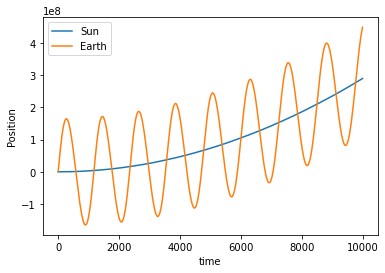
">

**Solar Year Verification**

1. Plotted on the graphs are different planets' z-position over time relative to the sun's z-position.  Looking at Earth's we see that one period of the wave is equivalent to 1 solar year.  We can deduce that if each planet's year is equivalent to the real world values relative to solar years, then the model is correct.

2. Mar's year is 1.88 solar years which we can observe on the graph.
<img src="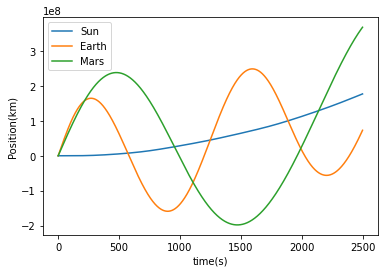
">
3. Looking at Venus's year (1.62 solar years):
<img src="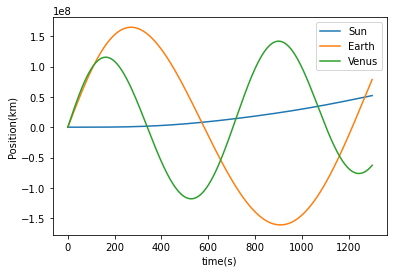
">
4. Looking at Mercury's year (.24 solar years):
<img src="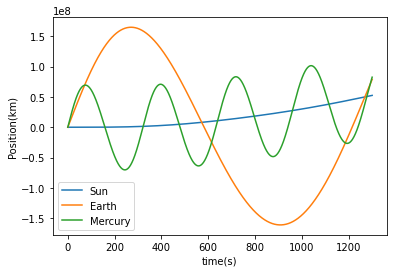
">

**Outputs for different values of $dt$**

$dt = 1$ is the most accurate in terms of output data, but visually $dt = 0.1$ appears more accurate.

1. $dt = 0.01$
<img src="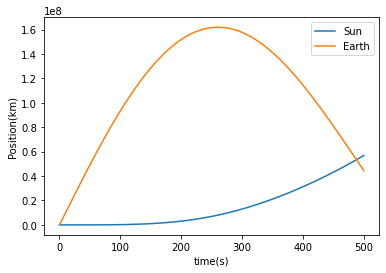
">
2.$dt = 0.1$
<img src="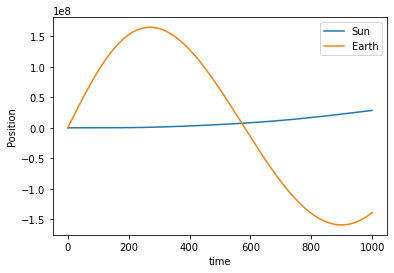
">
3. $dt = 1$
<img src="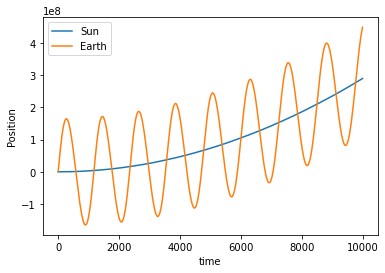
">